# Elements of convex analysis

## Class 6: StochasticGradient Descent

The purpose of this notebook is to implement Stochastic Gradient Descent with a regression on a dataset.
The notebook will use helper functions (in [ex6_helpers.py](ex6_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib**, **seaborn** and possibly **pytorch** libraries.


In [5]:
# a line making the graphs show up in the notebook
# you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports:
from ex6_helpers import plot_1d_regression_path, plot_1d_regression_lines, generate_1d_regression_data

import numpy as np
from matplotlib import pyplot as plt

First create some  predefined data for linear regression.
x is our set of object with features (actually only one feature this time).
y is the variable we want to predict based on x.

In [6]:
x, y = generate_1d_regression_data()

Plot the data perhaps


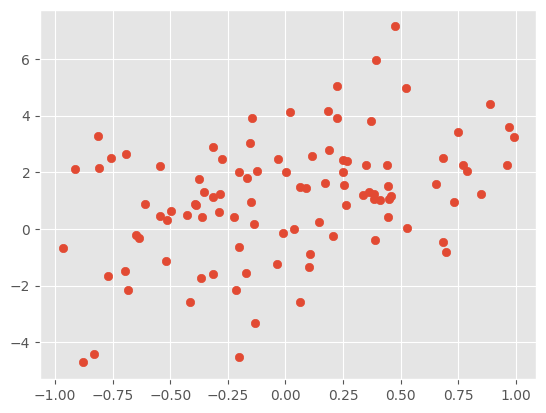

In [7]:
plt.scatter(x, y)

## Your task is to implement linear regression with mean squared error and solve it using exact solution and three versions of gradient descent (batch, minibatch and online).

$$ argmin_{a,b \in R } \frac{1}{2n}\sum\limits_{i=0}^{n-1}(ax + b - y)^2$$

Note that input vectors are 1-dimensional (they are scalars)
but the problem of optimization itself is 2-dimensional as we are
optimizing w.r.t. the slope (a coefficient) and bias term (intercept).



Your implementations should return a list of tuples (a,b) which were
encountered by the algorithm in iterations.
This will let you use the visualisation functions.

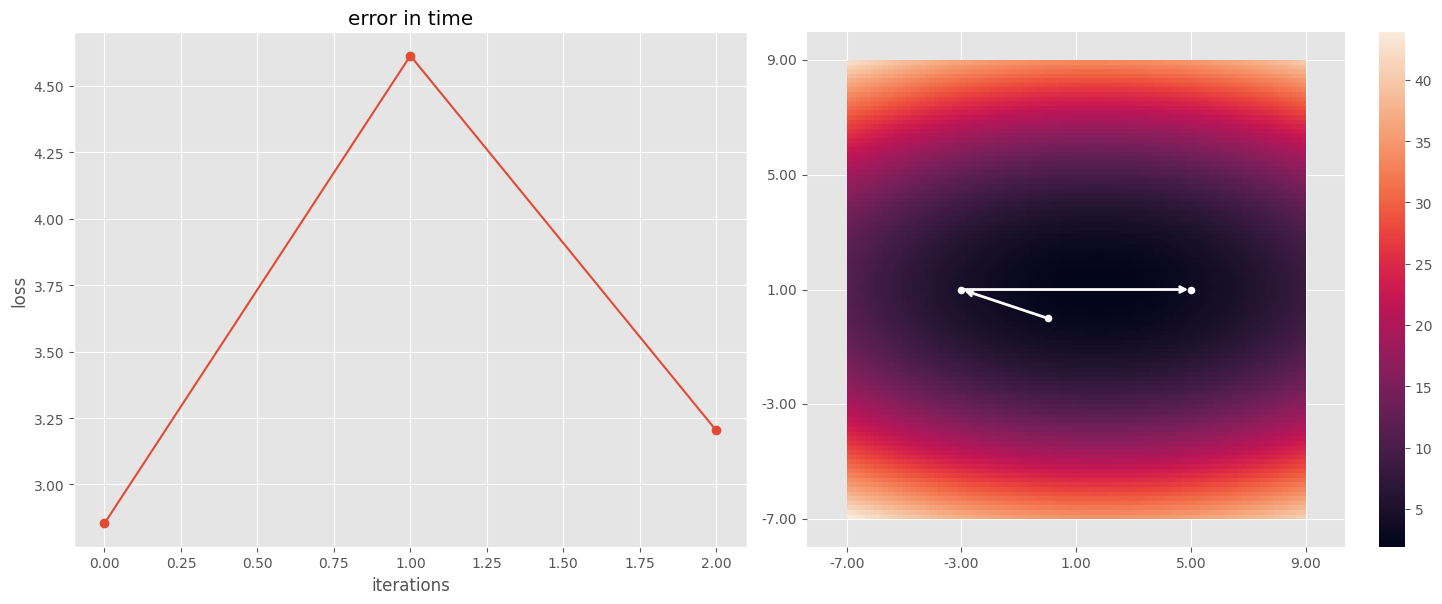

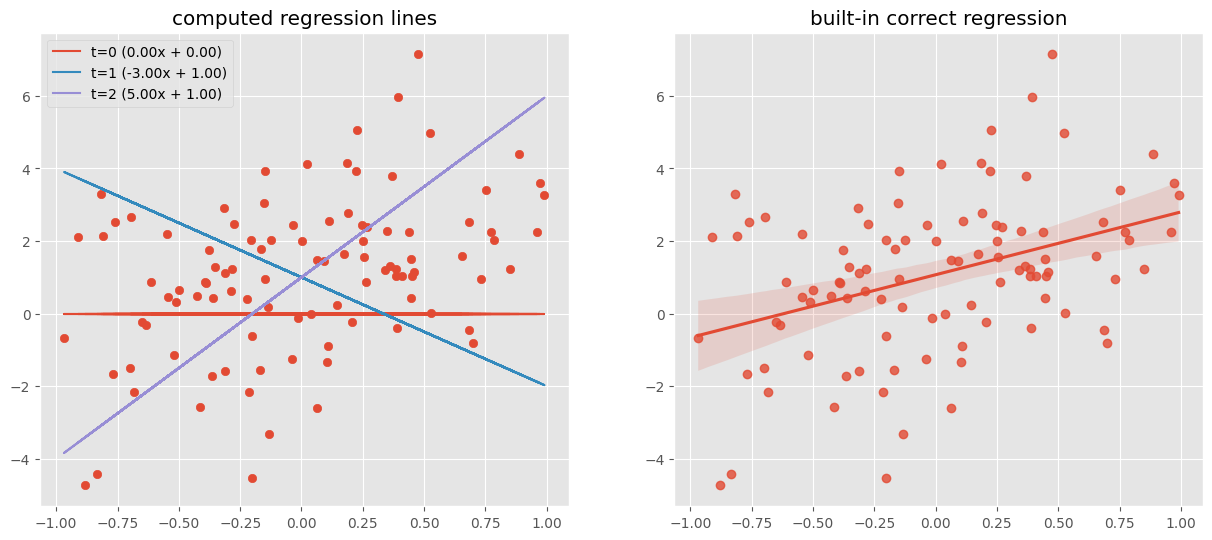

In [8]:
sample_points = [(0,0),(-3,1),(5,1)]
plot_1d_regression_path(x, y, sample_points)
plot_1d_regression_lines(x, y, sample_points)


Test different number of iterations, batchsizes, starting points and learning rates.
Some propositions: $x_0=(0,0)$, $\eta_0 = 0.1$, 5 iterations, batchsizes $
\{5,10,20\}$

In [48]:
def sgd(x, y, iters, a0, b0, batchsize, lr):
    path = [(a0, b0)]
    data_shuffled = np.random.permutation(np.array(list(zip(x, y))))
    batches = [data_shuffled[i:i+batchsize] for i in range(0, len(data_shuffled), batchsize)]
    for i in range(iters):
        a, b = path[-1]
        x, y = batches[i % len(batches)].T
        a = a - lr * 2 * np.mean(x * (a * x + b - y))
        b = b - lr * 2 * np.mean(a * x + b - y)
        path.append((a, b))
    return path


In [49]:
def ogd(x, y, iters, a0, b0,  lr):
    path = [(a0, b0)]
    data_shuffled = np.random.permutation(np.array(list(zip(x, y))))
    for i in range(iters):
        x, y = data_shuffled[i % len(data_shuffled)]
        a, b = path[-1]
        a = a - lr * 2 * np.mean(x * (a * x + b - y))
        b = b - lr * 2 * np.mean(a * x + b - y)
        path.append((a, b))
    return path

In [50]:
def gd(x, y, iters, a0, b0, lr):
    path = [(a0, b0)]
    for i in range(iters):
        a, b = path[-1]
        a = a - lr * 2 * np.mean((a * x + b - y) * x)
        b = b - lr * 2 * np.mean(a * x + b - y)
        path.append((a, b))
    return path

I know that if I would first implement GD, I would not copy the code, but the current code is in the same order as supplied by the author.

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


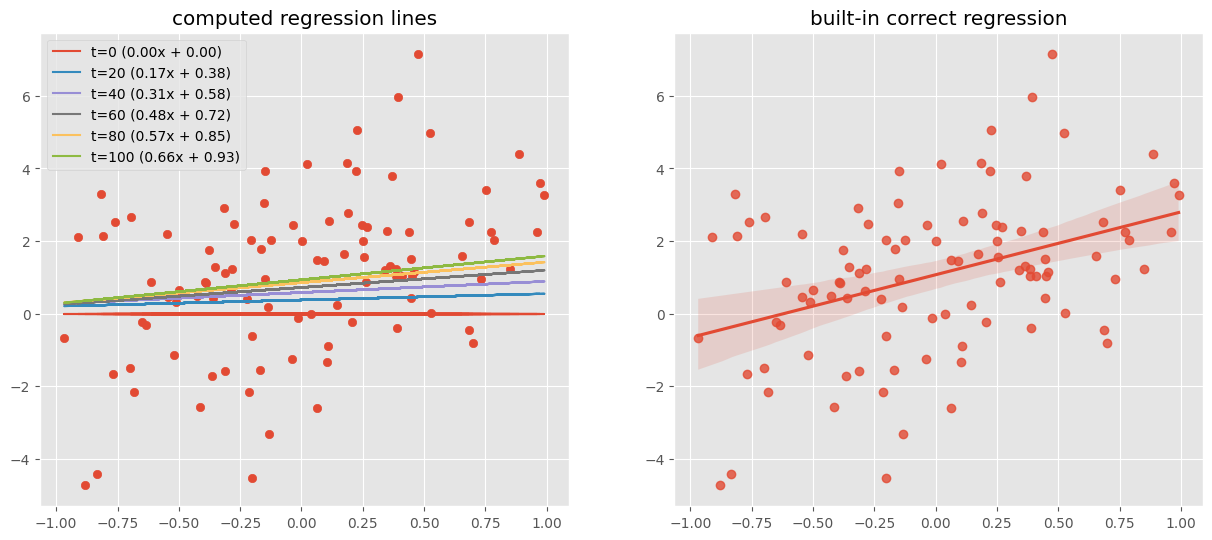

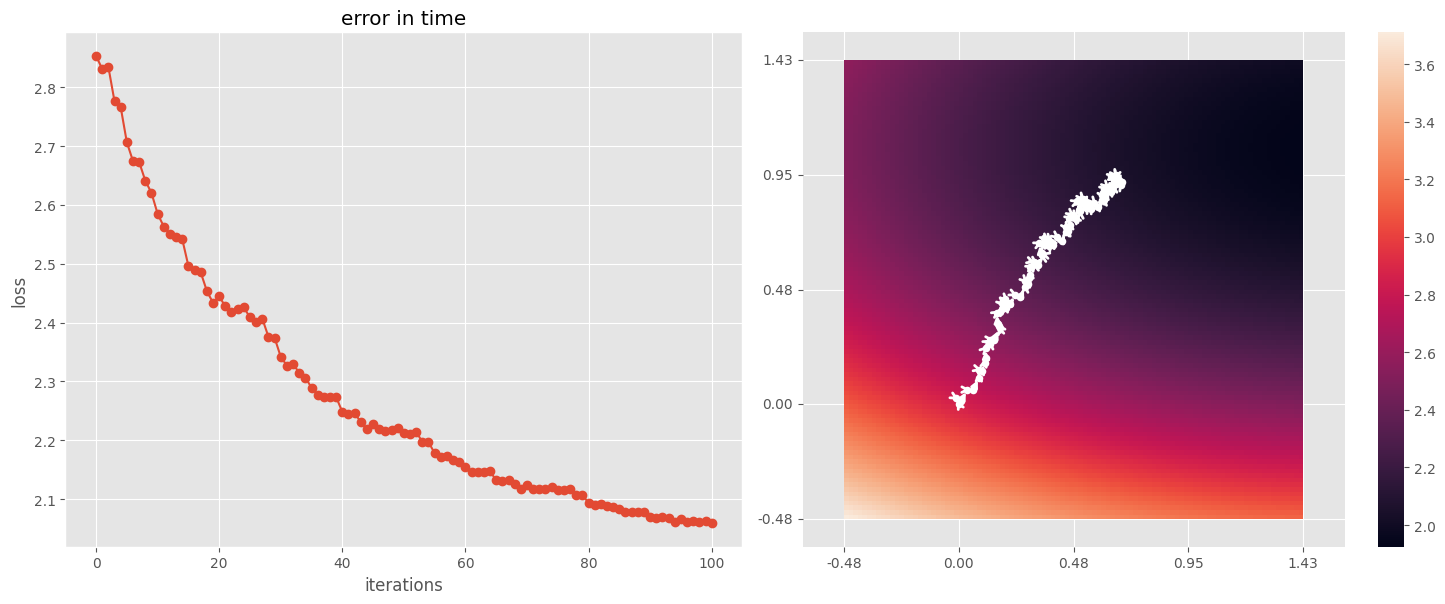

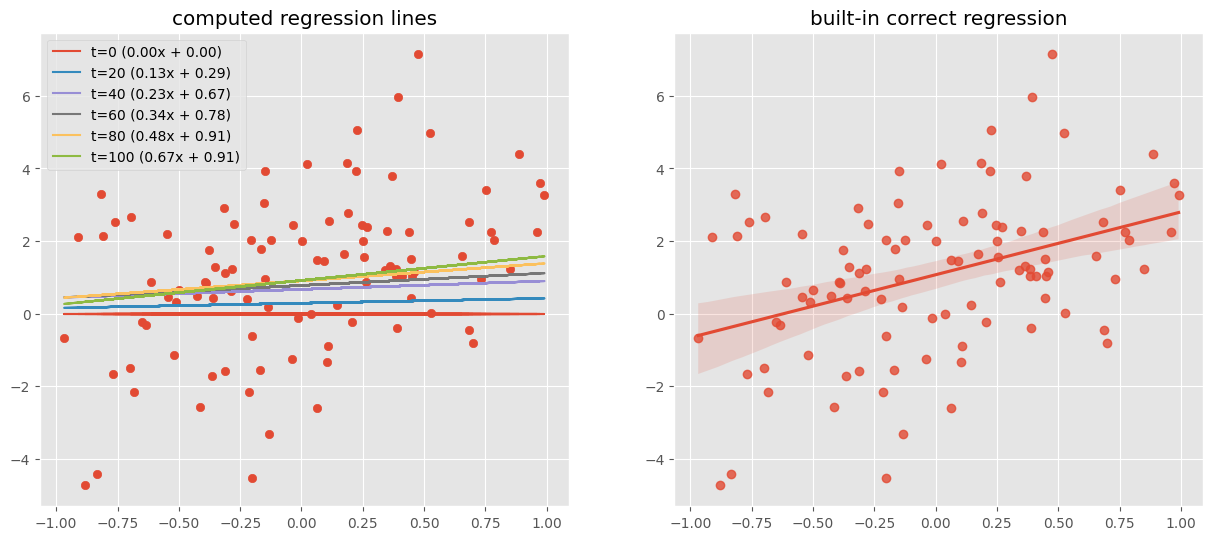

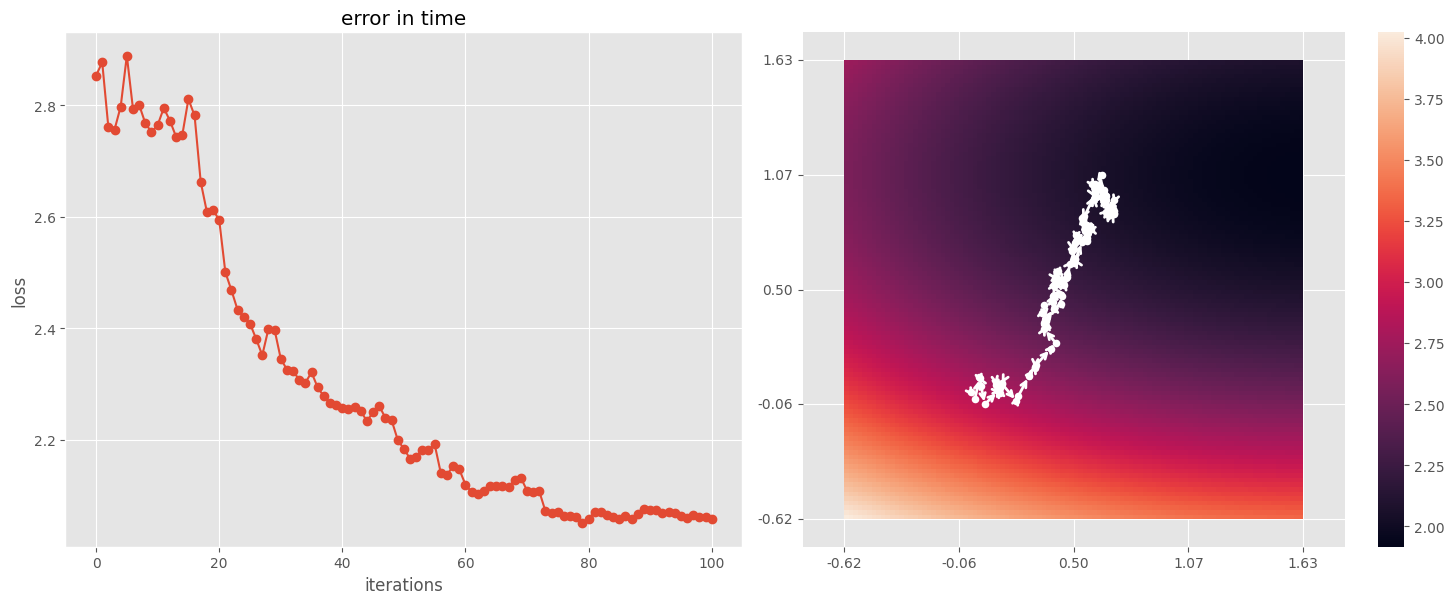

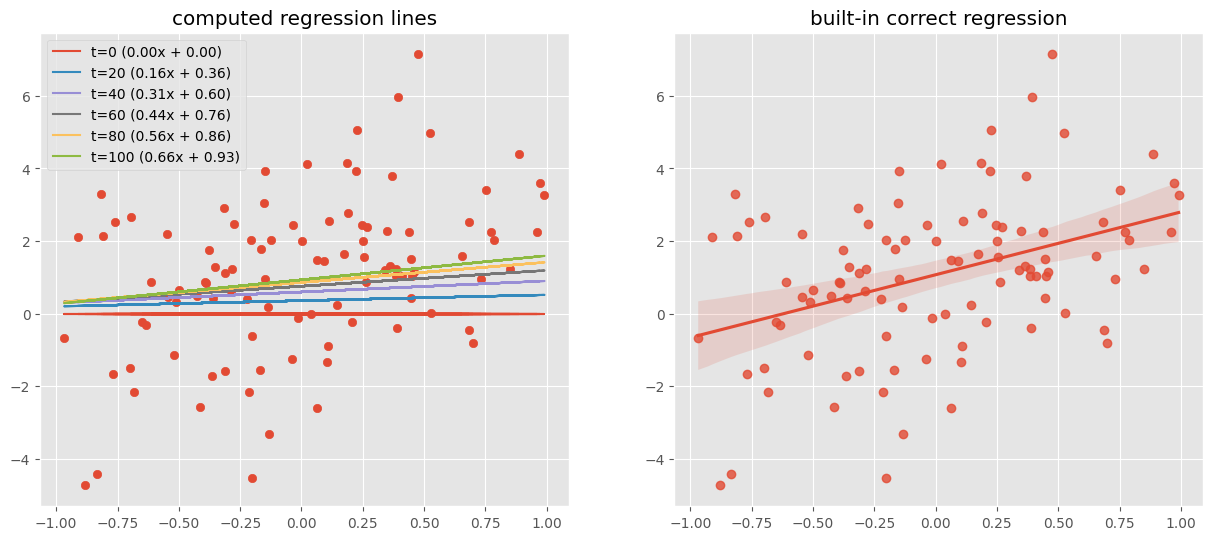

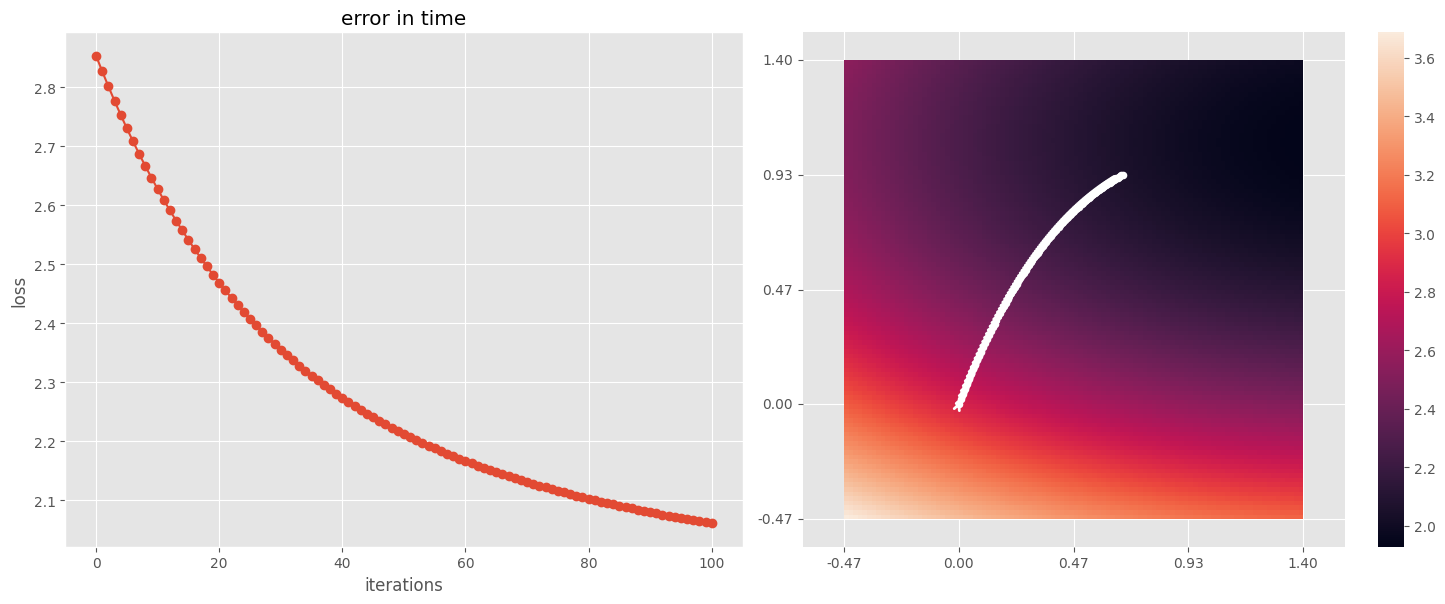

In [47]:
plot_1d_regression_lines(x, y, sgd(x, y, 100, 0, 0, 4, 0.01))
plot_1d_regression_path(x, y, sgd(x, y, 100, 0, 0, 4, 0.01))
plot_1d_regression_lines(x, y, ogd(x, y, 100, 0, 0, 0.01))
plot_1d_regression_path(x, y, ogd(x, y, 100, 0, 0, 0.01))
plot_1d_regression_lines(x, y, gd(x, y, 100, 0, 0, 0.01))
plot_1d_regression_path(x, y, gd(x, y, 100, 0, 0, 0.01))